# Canberra Real Estate Sales 2007-2019

## Introduction

Data was obtained from HtAG®. HtAG® or Higher than Average Growth is an analytics portal that assists real estate professionals, investors and home buyers in making property-related decisions with the help of timely and actionable real estate market data. HtAG® leverages the benefits of machine learning to rank the growth potential of over 420 Local Government Areas and 6,200 suburbs, Australia wide.

> #### Column Descriptions
- datesold = date when the property was sold
- price = price of the property when it was sold
- suburb = suburbs in Canberra, Australia
- postcode = postal code of a place
- lat = latitude of the location
- lon = longitude of the location
- parking = number of parking lots
- bathrooms = number of bathrooms
- bedrooms = number of bedrooms
- propertyType = type of the property
- suburbid = the id of the suburbs

> #### Background Stories

The world was experiencing a global financial crisis around 2007 to 2008 due to excessive risk-taking by banks combined with the bursting of the United States housing bubble caused the values of securities tied to U.S. real estate to plummet, damaging financial institutions globally and culminating an international banking crisis. The crisis sparked the Great Recession, which at the time was the most severe global recession since the "Great Depression". Canberra as the capital city of Australia was no exception to this crisis.

Through this project, we hope to understand how the real estate market in Canberra responded to this incident and what is the aftermath pricing trend. We are also hoping to gain any valuable insight in the Canberra real estate market.

> #### Questions
- What features affect the real estate prices in Canberra?
- What is the real estate prices in Canberra going to be like in the near future according to the given datasets?

> #### The Scope of the Research Problem
- Historical data from 2007 - 2019
- Maximum real estate price capped at 5M (for analysis and visualization)

> #### Users
- Users & renters
- Property investors
- Renovators

## Data Modelling

> #### Import Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import pingouin as pg

import category_encoders as ce
import statsmodels.api as sm
from statsmodels.api import OLS
import sklearn
from sklearn import metrics

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

import warnings
warnings.filterwarnings('ignore')

import pickle
import joblib

sns.set()

> #### Import the Raw Dataset

In [2]:
raw_df = pd.read_csv('property_sales_canberra.csv')

In [3]:
raw_df.head()

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
0,9/06/2000,223000.0,Nicholls,2913,NaN,NaN,2,2.0,4,house,ACT708
1,1/01/2001,350000.0,Ngunnawal,2913,NaN,NaN,1,NaN,3,house,ACT706
2,11/12/2003,550000.0,Weston,2611,NaN,NaN,2,NaN,4,house,ACT441
3,21/09/2005,276000.0,Isabella Plains,2905,NaN,NaN,1,1.0,3,house,ACT612
4,1/11/2005,400000.0,Conder,2906,NaN,NaN,2,NaN,5,house,ACT613


## Preprocessing

> #### Descriptive Statistics of the Variables

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43178 entries, 0 to 43177
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datesold      43178 non-null  object 
 1   price         42435 non-null  float64
 2   suburb        43178 non-null  object 
 3   postcode      43178 non-null  int64  
 4   lat           42033 non-null  float64
 5   lon           42033 non-null  float64
 6   parking       43178 non-null  int64  
 7   bathrooms     42499 non-null  float64
 8   bedrooms      43178 non-null  int64  
 9   propertyType  43178 non-null  object 
 10  suburbid      43178 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.6+ MB


In [5]:
raw_df.describe(include='all')

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
count,43178,4.243500e+04,43178,43178.000000,42033.000000,42033.000000,43178.000000,42499.000000,43178.000000,43178,43178
unique,3851,NaN,107,NaN,NaN,NaN,NaN,NaN,NaN,2,107
top,28/10/2017,NaN,Kambah,NaN,NaN,NaN,NaN,NaN,NaN,house,ACT601
freq,56,NaN,1404,NaN,NaN,NaN,NaN,NaN,NaN,36236,1404
mean,NaN,6.037398e+05,NaN,2728.855644,-35.293447,149.096122,1.760017,1.643403,3.193501,NaN,NaN
std,NaN,3.139764e+05,NaN,146.564444,0.091796,0.040526,0.937361,0.644463,0.990638,NaN,NaN
min,NaN,5.000000e+04,NaN,2092.000000,-35.509975,148.921424,0.000000,1.000000,0.000000,NaN,NaN
25%,NaN,4.300000e+05,NaN,2607.000000,-35.363857,149.067390,1.000000,1.000000,3.000000,NaN,NaN
50%,NaN,5.390000e+05,NaN,2615.000000,-35.270536,149.099522,2.000000,2.000000,3.000000,NaN,NaN
75%,NaN,6.760000e+05,NaN,2905.000000,-35.212323,149.130708,2.000000,2.000000,4.000000,NaN,NaN


In [6]:
# Checking raw datasets

desc = []
for i in raw_df.columns:
    desc.append([i,
                     raw_df[i].dtypes,
                     raw_df[i].isna().sum(),
                     round((raw_df[i].isna().sum())/len(raw_df)*100,2),
                     raw_df[i].nunique(),
                     raw_df[i].drop_duplicates().sample(2).values])
pd.DataFrame(desc, columns = ['dataFeatures', 'dataType',' null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,datesold,object,0,0.00,3851,"[6/04/2017, 4/11/2014]"
1,price,float64,743,1.72,2701,"[512500.0, 200000.0]"
2,suburb,object,0,0.00,107,"[Wright, Dickson]"
3,postcode,int64,0,0.00,32,"[2163, 2604]"
4,lat,float64,1145,2.65,29673,"[-35.370651, -35.26142]"
5,lon,float64,1145,2.65,28505,"[149.11236599999998, 149.148296]"
6,parking,int64,0,0.00,18,"[21, 8]"
7,bathrooms,float64,679,1.57,9,"[3.0, 1.0]"
8,bedrooms,int64,0,0.00,13,"[11, 8]"
9,propertyType,object,0,0.00,2,"[house, unit]"


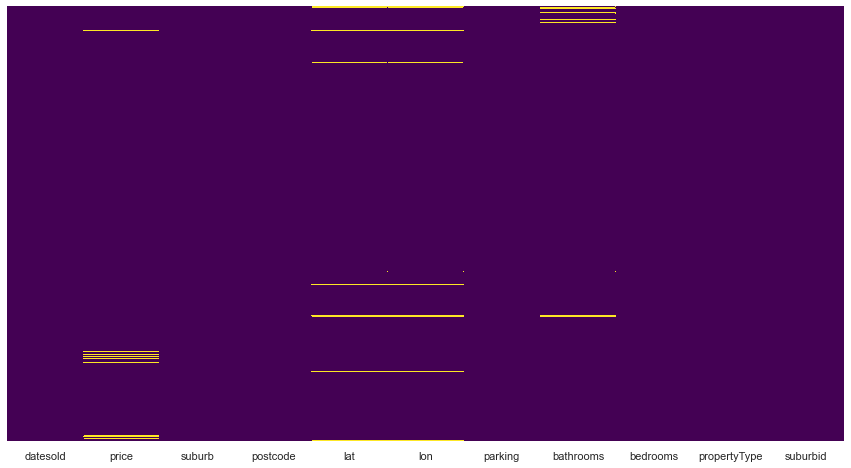

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(raw_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [8]:
raw_df.isna().sum()

datesold           0
price            743
suburb             0
postcode           0
lat             1145
lon             1145
parking            0
bathrooms        679
bedrooms           0
propertyType       0
suburbid           0
dtype: int64

In [9]:
df = raw_df.copy()

- __Determining Numerical and Categorical Features:__

In [10]:
len(df.columns)  # checking

11

In [11]:
categorical_columns = list(df.describe(exclude='number').columns)
numerical_columns = list(df.describe().columns)

In [12]:
numerical_columns.remove('postcode')
categorical_columns.append('postcode')

In [13]:
categorical_columns, len(categorical_columns)

(['datesold', 'suburb', 'propertyType', 'suburbid', 'postcode'], 5)

In [14]:
numerical_columns, len(numerical_columns)

(['price', 'lat', 'lon', 'parking', 'bathrooms', 'bedrooms'], 6)

- __Checking the Distribution of the Datasets Numerical Features Through Bar Plots:__

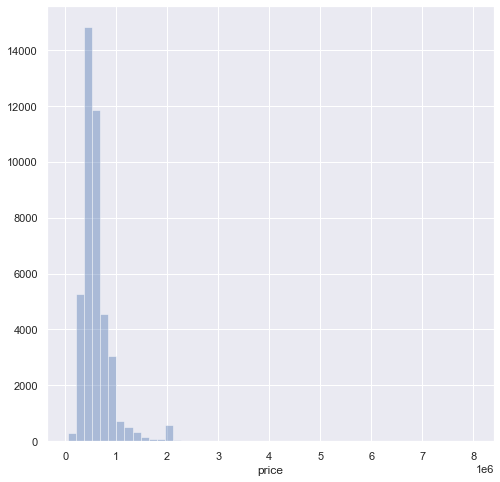

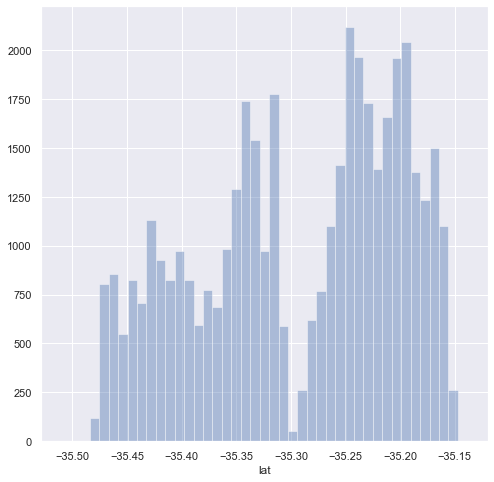

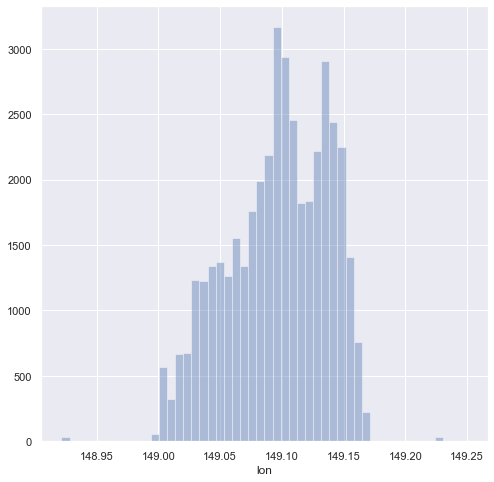

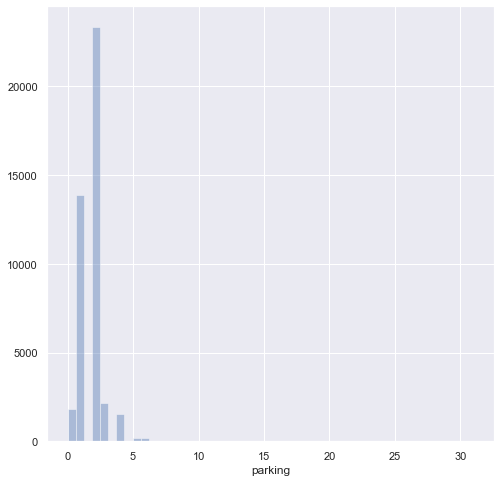

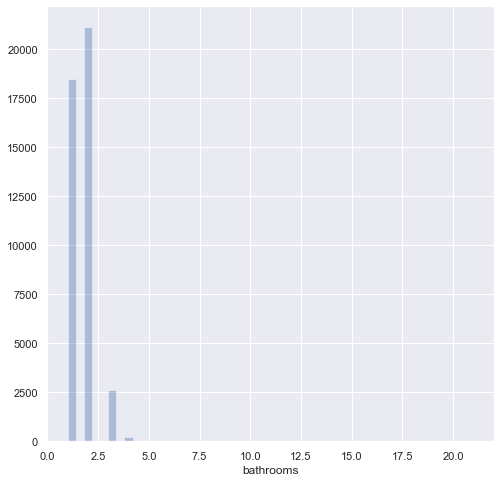

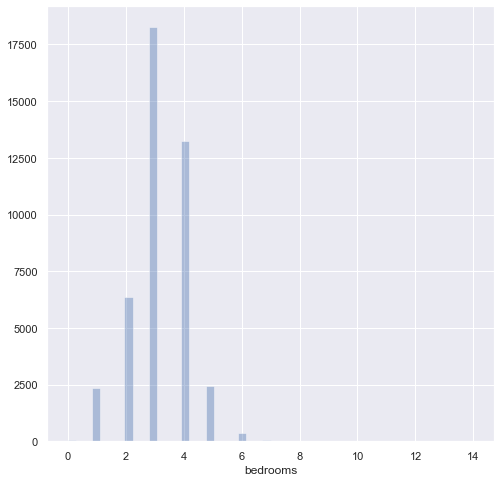

In [15]:
for i in numerical_columns:
    plt.figure(figsize = (8,8))
    sns.distplot(df[i], kde=False)

- __Using Scatter Plot to See the Relationship Between 'price' Column and Other Numerical Columns:__

In [16]:
numerical_columns_noprice = numerical_columns.copy()

In [17]:
numerical_columns_noprice.remove('price')

In [18]:
numerical_columns_noprice

['lat', 'lon', 'parking', 'bathrooms', 'bedrooms']

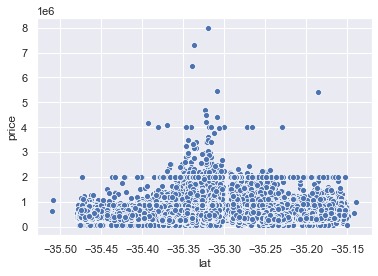

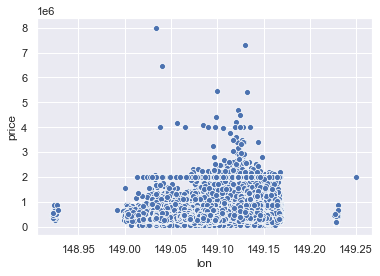

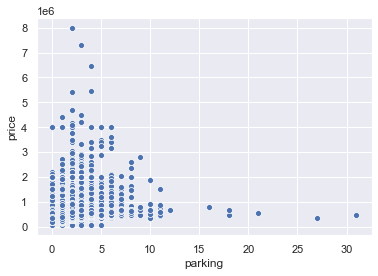

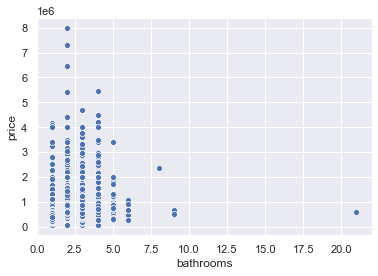

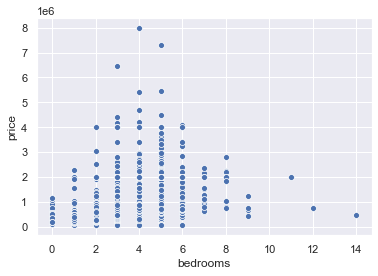

In [19]:
for i in numerical_columns_noprice:
    sns.scatterplot(df[i], df['price'])
    plt.show()

- __Checking Numerical Features Through Describe Method:__

In [20]:
df[numerical_columns].describe()

,price,lat,lon,parking,bathrooms,bedrooms
count,4.243500e+04,42033.000000,42033.000000,43178.000000,42499.000000,43178.000000
mean,6.037398e+05,-35.293447,149.096122,1.760017,1.643403,3.193501
std,3.139764e+05,0.091796,0.040526,0.937361,0.644463,0.990638
min,5.000000e+04,-35.509975,148.921424,0.000000,1.000000,0.000000
25%,4.300000e+05,-35.363857,149.067390,1.000000,1.000000,3.000000
50%,5.390000e+05,-35.270536,149.099522,2.000000,2.000000,3.000000
75%,6.760000e+05,-35.212323,149.130708,2.000000,2.000000,4.000000
max,8.000000e+06,-35.138572,149.250290,31.000000,21.000000,14.000000


- __Checking Categorical Features Through Describe Method:__

In [21]:
df[categorical_columns].describe(include='all')

,datesold,suburb,propertyType,suburbid,postcode
count,43178,43178,43178,43178,43178.000000
unique,3851,107,2,107,NaN
top,28/10/2017,Kambah,house,ACT601,NaN
freq,56,1404,36236,1404,NaN
mean,NaN,NaN,NaN,NaN,2728.855644
std,NaN,NaN,NaN,NaN,146.564444
min,NaN,NaN,NaN,NaN,2092.000000
25%,NaN,NaN,NaN,NaN,2607.000000
50%,NaN,NaN,NaN,NaN,2615.000000
75%,NaN,NaN,NaN,NaN,2905.000000


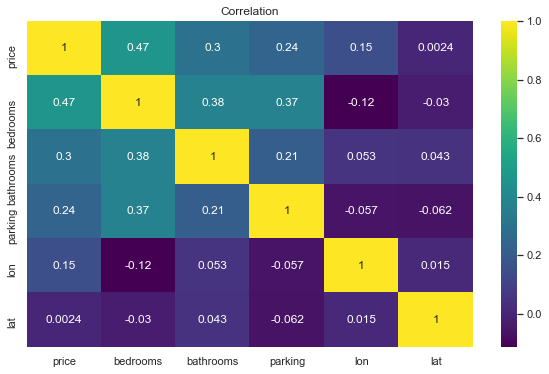

In [22]:
# Correlation Inspection

target = 'price'
k = 7 # number of variables for heatmap
cols = df[numerical_columns].corr().nlargest(k, target)[target].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.title('Correlation')
plt.show()

Through this heatmap it can be seen that 'lat', and 'lon' columns have relatively small correlation with the 'price' column, while 'bedrooms' has the highest.

> #### Removing Features

- __Checking the Features:__

In [23]:
categorical_columns

['datesold', 'suburb', 'propertyType', 'suburbid', 'postcode']

In [24]:
numerical_columns

['price', 'lat', 'lon', 'parking', 'bathrooms', 'bedrooms']

- __Removing 'datesold' and 'suburbid' features:__

In [25]:
df['datesold'] = pd.to_datetime(df['datesold'])
type(df['datesold'][0])  # checking

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
df['suburb'].nunique()  # checking 'suburb'

107

In [27]:
# Removing data before 2007 because there are too many missing values

df.drop(df[df['datesold'].dt.year<2007].index, inplace=True)

In [28]:
df['suburb'].nunique()  # checking 'suburb'

107

In [29]:
print("Number of unique values in 'suburb' column: ", df['suburb'].nunique())
print("Number of unique values in 'suburbid' column: ", df['suburbid'].nunique())

Number of unique values in 'suburb' column:  107
Number of unique values in 'suburbid' column:  107


In [30]:
categorical_columns.remove('datesold')
categorical_columns.remove('suburbid')

In [31]:
categorical_columns

['suburb', 'propertyType', 'postcode']

'datesold' column is going to be dropped since this feature only beneficial for data analysis and visualization stages; and not in modelling phase. In addition, 'suburbid' feature is also going to be removed since it is just conveying the id of suburbs in 'suburb' column.

- __Removing 'postcode' feature:__

In [32]:
print("Number of unique values in 'suburb' column: ", df['suburb'].nunique())
print("Number of unique values in 'postcode' column: ", df['postcode'].nunique())

Number of unique values in 'suburb' column:  107
Number of unique values in 'postcode' column:  32


In [33]:
categorical_columns.remove('postcode')

In [34]:
categorical_columns

['suburb', 'propertyType']

At this stage, 'postcode' feature is going to be deleted since it covers Canberra area significantly wider than 'suburb' feature, thus it lacks precision. This machine learning model will rely on 'suburb' feature to categorize real estate properties which are being sold in Canberra.

- __Removing 'lat' and 'lon' features:__

In [35]:
numerical_columns.remove('lat')
numerical_columns.remove('lon')

In [36]:
numerical_columns

['price', 'parking', 'bathrooms', 'bedrooms']

As 'lat' and 'lon' columns have low correlation values with 'price' column and this machine learning model is going to solely rely on 'suburb' as the main feature to categorize properties that are being sold in Canberra, both of them are going to be removed.

- __Updating Data Frame:__

In [37]:
df_numerical = df[numerical_columns]
df_categorical = df[categorical_columns]
df = pd.concat([df_numerical, df_categorical], axis=1)

In [38]:
df.head(3)

,price,parking,bathrooms,bedrooms,suburb,propertyType
42,450000.0,2,2.0,3,Conder,house
43,525000.0,2,NaN,4,Pearce,house
44,250000.0,1,1.0,3,Isabella Plains,house


> #### Removing Missing Values

- __Removing Missing Values in 'price' column:__

In [39]:
df.isna().sum()

price           743
parking           0
bathrooms       667
bedrooms          0
suburb            0
propertyType      0
dtype: int64

In [40]:
df.dropna(subset=['price'], inplace=True)

In [41]:
df.isna().sum()

price             0
parking           0
bathrooms       646
bedrooms          0
suburb            0
propertyType      0
dtype: int64

Missing values in 'price' column are going to be dropped since this machine learning model is depended on the historical datas in this column. Furthermore, missing values that exist in 'bathrooms' feature will be   resolved later through pipeline.

## Machine Learning Modelling

- __Determining the Dependent and Independent Features:__

In [42]:
# Selecting features and target

y = df['price']
X = df.drop('price', axis=1)

In [43]:
y[:5]  # checking

42    450000.0
43    525000.0
44    250000.0
45    350000.0
46    290000.0
Name: price, dtype: float64

In [44]:
X.head()

,parking,bathrooms,bedrooms,suburb,propertyType
42,2,2.0,3,Conder,house
43,2,NaN,4,Pearce,house
44,1,1.0,3,Isabella Plains,house
45,1,2.0,3,Gordon,house
46,1,1.0,3,Conder,house


- __Splitting Training-validation Set and Test Set:__

In [45]:
# Train test split

X_train_val, X_test, y_train_val, y_test= train_test_split(X, y, random_state=2021, test_size=0.2)

- __Updating Numerical and Categorical Columns:__

In [46]:
numerical_columns = list(X.describe().columns)
categorical_columns = list(X.describe(exclude='number').columns)

In [47]:
numerical_columns

['parking', 'bathrooms', 'bedrooms']

In [48]:
categorical_columns

['suburb', 'propertyType']

> ## Parametric Benchmark Model

- __Creating a Multiple Linear Regression Model:__

In [49]:
df.isna().sum()  # checking

price             0
parking           0
bathrooms       646
bedrooms          0
suburb            0
propertyType      0
dtype: int64

In [50]:
# Creating a simple imputer pipeline
# imputing missing values in 'bathrooms' column with median resulting in little to no difference in 'bathrooms' standard deviation
numerical_pipeline = Pipeline([
    ('impute_num', SimpleImputer(strategy='median')),
    ('robust', RobustScaler())  # robust to outliers
])

# Creating a binary encoder pipeline
binary_pipeline = Pipeline([
    ('binary', ce.BinaryEncoder())
])

# Creating a onehot encoder pipeline
onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

# Creating a columns transformer
transformer_mlr = ColumnTransformer([
    ('impute_pipe', numerical_pipeline, numerical_columns), 
    ('onehot_pipe', onehot_pipeline, ['propertyType']),  
    ('binary_pipe', binary_pipeline, ['suburb'])
], remainder='passthrough')

In [51]:
X_train_val_transform = transformer_mlr.fit_transform(X_train_val, y_train_val)
X_test_transform = transformer_mlr.transform(X_test)

In [52]:
X_train_val_transform  # checking

array([[-1., -1.,  0., ...,  0.,  0.,  1.],
       [-1.,  0.,  1., ...,  0.,  1.,  0.],
       [-1.,  0.,  0., ...,  0.,  1.,  1.],
       ...,
       [ 0.,  0.,  1., ...,  1.,  0.,  0.],
       [-1., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  1., -1., ...,  1.,  1.,  0.]])

In [53]:
X_test_transform  # checking

array([[ 4.,  0.,  3., ...,  1.,  0.,  1.],
       [ 1.,  0.,  1., ...,  0.,  1.,  1.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.],
       ...,
       [-1., -1.,  0., ...,  0.,  1.,  0.],
       [-1.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

In [54]:
x = sm.add_constant(X_train_val_transform)
results = sm.OLS(y_train_val, x).fit()

In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     1030.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:24:43   Log-Likelihood:            -4.7248e+05
No. Observations:               33914   AIC:                         9.450e+05
Df Residuals:                   33902   BIC:                         9.451e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.494e+05   4510.902    121.784      0.000    5.41e+05    5.58e+05
x1          2.098e+04   1699.837     12.342      0.000    1.76e+04    2.43e+04
x2           6.11e+04   2508.290     24.360      0.000    5.62e+04     6.6e+04
x3          1.371e+05   2070.622     66.229      0.000    1.33e+05    1.41e+05
x4          5.463e+04   5068.661     10.779      0.000    4.47e+04    6.46e+04
x5         -1.443e-12   1.81e-12     -0.797      0.426   -4.99e-12    2.11e-12
x6          3.238e+04   3503.079      9.244      0.000    2.55e+04    3.92e+04
x7          1.005e+04   3293.860      3.051      0.002    3592.810    1.65e+04
x8         -9016.4322   3086.854     -2.921      0.003   -1.51e+04   -2966.094
x9          2.597e+04   2988.302      8.690      0.000    2.01e+04    3.18e+04
x10         1.552e+04   2987.680      5.195      0.000    9663.928    2.14e+04
x11         4.766e+04   2972.180     16.037      0.000    4.18e+04    5.35e+04
x12        -1.072e+04   2984.302     -3.591      0.000   -1.66e+04   -4866.439
==============================================================================
Omnibus:                    33719.785   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4171387.197
Skew:                           4.605   Prob(JB):                         0.00
Kurtosis:                      56.546   Cond. No.                     2.57e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.43e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- __Checking the Distribution of the Residuals:__

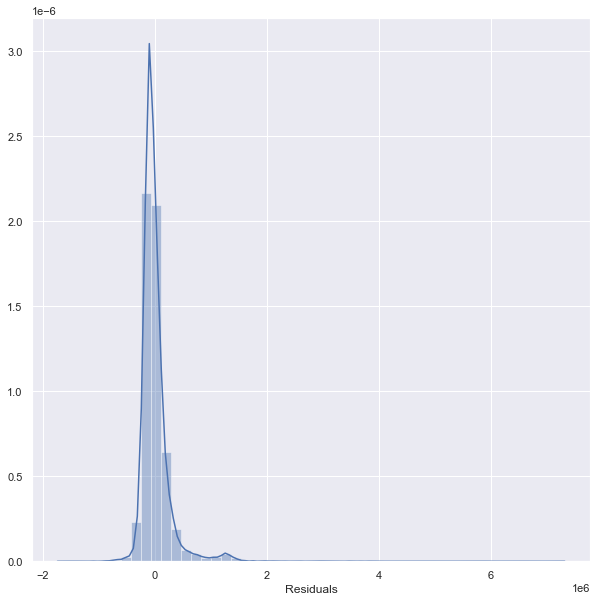

In [56]:
plt.figure(figsize=(10,10))
sns.distplot(results.resid)
plt.xlabel('Residuals')
plt.show()

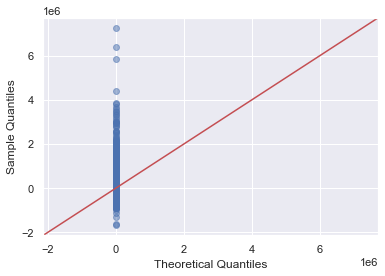

In [57]:
sm.qqplot(results.resid, line='45', alpha=0.5)
plt.show()

The residuals are not normally distributed. The metric that is going to be used for scoring the machine learning models is 'Mean Absolute Error' (MAE), since there are a lot of outliers.

- __Residual Analysis: Gauss-Markov__

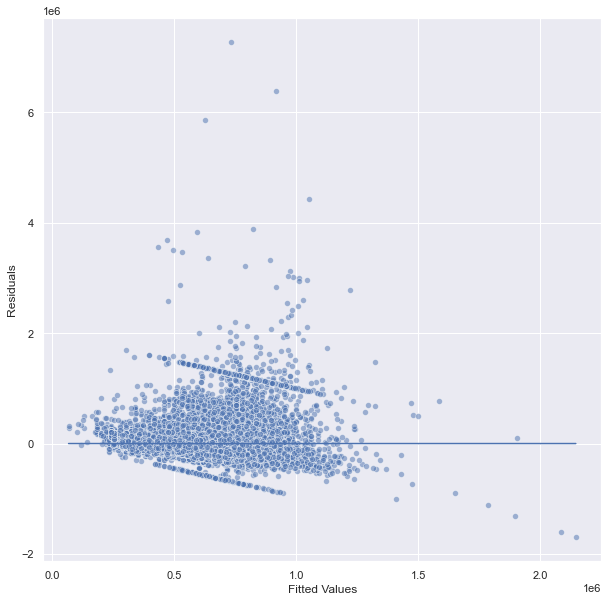

In [58]:
plt.figure(figsize=(10,10))
sns.scatterplot(results.fittedvalues, results.resid, alpha=0.5)
sns.lineplot(results.fittedvalues, 0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

__Non-constant standard deviation__ - Residuals that show an increasing trend.

It is not possible to use a parametric method in this machine learning model, since there is a violation in Gauss Markov rule.

> ## Non-parametric Benchmark Model

In [59]:
sklearn.metrics.SCORERS.keys() 

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

- __Creating a Decision Tree Regressor Benchmark Model:__

In [60]:
# Scoring: mean absolute error

dtr = DecisionTreeRegressor(max_depth=6, criterion='mae', random_state=2021)

In [61]:
# imputing missing values in 'bathrooms' column with median resulting in little to no difference in 'bathrooms' standard deviation

# Creating a columns transformer
transformer_dtr = ColumnTransformer([
    ('impute_num', SimpleImputer(strategy='median'), numerical_columns), 
    ('onehot', OneHotEncoder(drop='first'), ['propertyType']),  
    ('binary', ce.BinaryEncoder(), ['suburb'])    
], remainder='passthrough')

# Creating a pipeline for DTR benchmark model
pipe_dtr_bench = Pipeline([
    ('transformer', transformer_dtr),
    ('reg', dtr)
])

In [62]:
# Scoring: neg_mean_absolute_error
# There is to many outliers in residuals
# This metric is negatively-oriented scores, which means lower value is better

skfold = StratifiedKFold(n_splits = 5, random_state=2021, shuffle=True)
dtr_bench_cv = cross_val_score(pipe_dtr_bench, X_train_val, y_train_val, cv=skfold, scoring='neg_mean_absolute_error')
print('CV Decision Tree Regressor Benchmark:', dtr_bench_cv)
print('CV Decision Tree Regressor Benchmark Mean:', dtr_bench_cv.mean())

CV Decision Tree Regressor Benchmark: [-137564.61713106 -143645.73050273 -141731.51835471 -145000.31903288
 -140208.51961073]
CV Decision Tree Regressor Benchmark Mean: -141630.14092642226


- __Creating a XG Boost Regressor Benchmark Model:__

In [63]:
xgbr = xgb.XGBRegressor(max_depth=6, random_state=2021, n_jobs=-1)

In [64]:
# imputing missing values in 'bathrooms' column with median resulting in little to no difference in 'bathrooms' standard deviation

# Creating a columns transformer
transformer_xgbr = ColumnTransformer([
    ('impute_num', SimpleImputer(strategy='median'), numerical_columns), 
    ('onehot', OneHotEncoder(drop='first'), ['propertyType']),  
    ('binary', ce.BinaryEncoder(), ['suburb'])    
], remainder='passthrough')

# Creating a pipeline for XGBR benchmark model
pipe_xgbr_bench = Pipeline([
    ('transformer', transformer_xgbr),
    ('reg', xgbr)
])

In [65]:
# Scoring: neg_mean_absolute_error
# There is to many outliers in residuals
# This metric is negatively-oriented scores, which means lower value is better

skfold = StratifiedKFold(n_splits = 5, random_state=2021, shuffle=True)
xgbr_bench_cv = cross_val_score(pipe_xgbr_bench, X_train_val, y_train_val, cv=skfold, scoring='neg_mean_absolute_error')
print('CV XG Boost Regressor Benchmark:', xgbr_bench_cv)
print('CV XG Boost Regressor Benchmark Mean:', xgbr_bench_cv.mean())

CV XG Boost Regressor Benchmark: [-111943.0796154  -113865.2011497  -113087.33251096 -113743.70923978
 -110808.85246159]
CV XG Boost Regressor Benchmark Mean: -112689.63499548852


- __Creating a Gradient Boosting Regressor Benchmark Model:__

In [66]:
gbr= GradientBoostingRegressor(max_depth=6, random_state=2021)

In [67]:
# imputing missing values in 'bathrooms' column with median resulting in little to no difference in 'bathrooms' standard deviation

# Creating a columns transformer
transformer_gbr = ColumnTransformer([
    ('impute_num', SimpleImputer(strategy='median'), numerical_columns), 
    ('onehot', OneHotEncoder(drop='first'), ['propertyType']),  
    ('binary', ce.BinaryEncoder(), ['suburb'])    
], remainder='passthrough')

# Creating a pipeline for GBR benchmark model
pipe_gbr_bench = Pipeline([
    ('transformer', transformer_gbr),
    ('reg', gbr)
])

In [68]:
# Scoring: neg_mean_absolute_error
# There is to many outliers in residuals
# This metric is negatively-oriented scores, which means lower value is better

skfold = StratifiedKFold(n_splits = 5, random_state=2021, shuffle=True)
gbr_bench_cv = cross_val_score(pipe_gbr_bench, X_train_val, y_train_val, cv=skfold, scoring='neg_mean_absolute_error')
print('CV XG Boost Regressor Benchmark:', gbr_bench_cv)
print('CV XG Boost Regressor Benchmark Mean:', gbr_bench_cv.mean())

CV XG Boost Regressor Benchmark: [-117605.92891272 -120804.4953183  -120185.13092868 -124919.03646217
 -124407.21013676]
CV XG Boost Regressor Benchmark Mean: -121584.36035172586


- __Conclusion:__
In the benchmark modelling phase, XG Boosting benchmark model is the best machine learning model compared to others. The scoring method that is used to determine the best model is 'Mean Absolute Error' (MAE). This metric is negatively-oriented scores, which means lower value is better

> ## Non-parametric Tuned Model

- __Creating a Decision Tree Regressor Tuned Model:__

In [69]:
# imputing missing values in 'bathrooms' column with median resulting in little to no difference in 'bathrooms' standard deviation

# Creating a columns transformer
transformer_dtr = ColumnTransformer([
    ('impute_num', SimpleImputer(strategy='median'), numerical_columns), 
    ('onehot', OneHotEncoder(drop='first'), ['propertyType']),  
    ('binary', ce.BinaryEncoder(), ['suburb'])    
], remainder='passthrough')

# Creating a pipeline for DTR tuned model
pipe_dtr_tuned = Pipeline([
    ('transformer', transformer_dtr),
    ('reg', dtr)
])

In [70]:
pipe_dtr_tuned.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('impute_num', SimpleImputer(strategy='median'),
                                    ['parking', 'bathrooms', 'bedrooms']),
                                   ('onehot', OneHotEncoder(drop='first'),
                                    ['propertyType']),
                                   ('binary', BinaryEncoder(), ['suburb'])])),
  ('reg',
   DecisionTreeRegressor(criterion='mae', max_depth=6, random_state=2021))],
 'verbose': False,
 'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_num', SimpleImputer(strategy='median'),
                                  ['parking', 'bathrooms', 'bedrooms']),
                                 ('onehot', OneHotEncoder(drop='first'),
                                  ['propertyType']),
                                 ('binary', BinaryEncoder(), ['suburb'])]),
 'reg': DecisionTree

In [72]:
# DTR Tuned

hyperparam_space_dtr = {
    'reg__max_depth': [6, 10, 14, 18, 22],
    'reg__min_samples_split': [2, 3, 4, 5, 6],
    'reg__criterion': ['mse', 'mae', 'friedman_mse']
}

skfold = StratifiedKFold(n_splits=5, random_state=2021, shuffle=True)
gridsearch_dtr = GridSearchCV(
    pipe_dtr_tuned,
    param_grid = hyperparam_space_dtr,
    cv = skfold,
    scoring = 'neg_mean_absolute_error',
    n_jobs =-1,
    verbose=1
)

gridsearch_dtr.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  6.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['parking',
                                                                          'bathrooms',
                                                                          'bedrooms']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['propertyType']),
                                                     

In [73]:
print("Best DTR Tuned Model: ", gridsearch_dtr.best_estimator_)
print("DTR Tuned Model Best Score: ", gridsearch_dtr.best_score_)
print("DTR Tuned Model Best Params: ", gridsearch_dtr.best_params_)

Best DTR Tuned Model:  Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_num',
                                                  SimpleImputer(strategy='median'),
                                                  ['parking', 'bathrooms',
                                                   'bedrooms']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['propertyType']),
                                                 ('binary', BinaryEncoder(),
                                                  ['suburb'])])),
                ('reg',
                 DecisionTreeRegressor(criterion='mae', max_depth=22,
                                       min_samples_split=6,
                                       random_state=2021))])
DTR Tuned Model Best Score:  -1

In [74]:
skfold = StratifiedKFold(n_splits=5, random_state=2021, shuffle=True)
dtr_tuned = gridsearch_dtr.best_estimator_
dtr_tuned_cv = cross_val_score(dtr_tuned, X_train_val, y_train_val, cv=skfold, scoring='neg_mean_absolute_error', n_jobs=-1)
print('CV DTR Tuned:', dtr_tuned_cv)
print('CV DTR Tuned Mean:', dtr_tuned_cv.mean())

CV DTR Tuned: [-110608.51009878 -112529.54688191 -109243.56051894 -112804.83517618
 -112229.35549985]
CV DTR Tuned Mean: -111483.16163513195


In [75]:
# DTR Tuned Model CV Result

gridsearch_dtr_df = pd.DataFrame(gridsearch_dtr.cv_results_)
gridsearch_dtr_df.sort_values('rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg__criterion,param_reg__max_depth,param_reg__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
49,25.205454,1.355715,0.012405,0.000484,mae,22,6,"{'reg__criterion': 'mae', 'reg__max_depth': 22...",-110608.510099,-112529.546882,-109243.560519,-112804.835176,-112229.355500,-111483.161635,1354.944780,1
44,39.317005,1.675465,0.026009,0.006987,mae,18,6,"{'reg__criterion': 'mae', 'reg__max_depth': 18...",-110608.510099,-112529.546882,-109243.560519,-112804.098039,-112437.553671,-111524.653842,1380.063744,2
39,46.451210,2.474073,0.028407,0.010896,mae,14,6,"{'reg__criterion': 'mae', 'reg__max_depth': 14...",-109959.765812,-112324.473242,-109343.609981,-112731.019018,-113321.556989,-111536.085008,1582.975833,3


- __Creating a XG Boost Regressor Tuned Model:__

In [76]:
# imputing missing values in 'bathrooms' column with median resulting in little to no difference in 'bathrooms' standard deviation

# Creating a columns transformer
transformer_xgbr = ColumnTransformer([
    ('impute_num', SimpleImputer(strategy='median'), numerical_columns), 
    ('onehot', OneHotEncoder(drop='first'), ['propertyType']),  
    ('binary', ce.BinaryEncoder(), ['suburb'])    
], remainder='passthrough')

# Creating a pipeline for XGBR tuned model
pipe_xgbr_tuned = Pipeline([
    ('transformer', transformer_xgbr),
    ('reg', xgbr)
])

In [77]:
pipe_xgbr_tuned.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('impute_num', SimpleImputer(strategy='median'),
                                    ['parking', 'bathrooms', 'bedrooms']),
                                   ('onehot', OneHotEncoder(drop='first'),
                                    ['propertyType']),
                                   ('binary', BinaryEncoder(), ['suburb'])])),
  ('reg',
   XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=6,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=-1, num_parallel_tree=None,
                random_state=2021, reg_alpha=None, reg_lambda=None,
                sc

In [78]:
# XGBR Tuned

hyperparam_space_xgbr = {
    'reg__max_depth': [6, 10, 14, 18, 22],
    'reg__n_estimators': [100, 120, 140, 160, 180],
    'reg__importance_type': ['gain', 'weight', 'cover', 'total_gain', 'total_cover']
}

skfold = StratifiedKFold(n_splits = 5, random_state=2021, shuffle=True)
gridsearch_xgbr = GridSearchCV(
    pipe_xgbr_tuned,
    param_grid = hyperparam_space_xgbr,
    cv = skfold,
    scoring = 'neg_mean_absolute_error',
    n_jobs =-1,
    verbose=1
)

gridsearch_xgbr.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed: 17.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['parking',
                                                                          'bathrooms',
                                                                          'bedrooms']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['propertyType']),
                                                     

In [79]:
print("Best XGBR Tuned Model: ", gridsearch_xgbr.best_estimator_)
print("XGBR Tuned Model Best Score: ", gridsearch_xgbr.best_score_)
print("XGBR Tuned Model Best Params: ", gridsearch_xgbr.best_params_)

Best XGBR Tuned Model:  Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_num',
                                                  SimpleImputer(strategy='median'),
                                                  ['parking', 'bathrooms',
                                                   'bedrooms']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['propertyType']),
                                                 ('binary', BinaryEncoder(),
                                                  ['suburb'])])),
                ('reg',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_b...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                     

In [80]:
skfold = StratifiedKFold(n_splits=5, random_state=2021, shuffle=True)
xgbr_tuned = gridsearch_xgbr.best_estimator_
xgbr_tuned_cv = cross_val_score(xgbr_tuned, X_train_val, y_train_val, cv=skfold, scoring='neg_mean_absolute_error', n_jobs=-1)
print('CV XGBR Tuned:', xgbr_tuned_cv)
print('CV XGBR Tuned Mean:', xgbr_tuned_cv.mean())

CV XGBR Tuned: [-110326.38386407 -113697.75697055 -111610.12171125 -112101.65841361
 -109983.79092106]
CV XGBR Tuned Mean: -111543.94237610782


In [81]:
# XGBR Tuned Model CV Result

gridsearch_xgbr_df = pd.DataFrame(gridsearch_xgbr.cv_results_)
gridsearch_xgbr_df.sort_values('rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg__importance_type,param_reg__max_depth,param_reg__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,6.025550,0.126831,0.038209,0.005742,gain,6,180,"{'reg__importance_type': 'gain', 'reg__max_dep...",-110326.383864,-113697.756971,-111610.121711,-112101.658414,-109983.790921,-111543.942376,1331.980892,1
29,11.424760,4.246529,0.036808,0.004309,weight,6,180,"{'reg__importance_type': 'weight', 'reg__max_d...",-110326.383864,-113697.756971,-111610.121711,-112101.658414,-109983.790921,-111543.942376,1331.980892,1
79,9.089037,0.294905,0.036408,0.003930,total_gain,6,180,"{'reg__importance_type': 'total_gain', 'reg__m...",-110326.383864,-113697.756971,-111610.121711,-112101.658414,-109983.790921,-111543.942376,1331.980892,1


- __Creating a Gradient Boosting Regressor Tuned Model:__

In [82]:
# imputing missing values in 'bathrooms' column with median resulting in little to no difference in 'bathrooms' standard deviation

# Creating a columns transformer
transformer_gbr = ColumnTransformer([
    ('impute_num', SimpleImputer(strategy='median'), numerical_columns), 
    ('onehot', OneHotEncoder(drop='first'), ['propertyType']),  
    ('binary', ce.BinaryEncoder(), ['suburb'])    
], remainder='passthrough')

# Creating a pipeline for XGBR tuned model
pipe_gbr_tuned = Pipeline([
    ('transformer', transformer_gbr),
    ('reg', gbr)
])

In [83]:
pipe_gbr_tuned.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('impute_num', SimpleImputer(strategy='median'),
                                    ['parking', 'bathrooms', 'bedrooms']),
                                   ('onehot', OneHotEncoder(drop='first'),
                                    ['propertyType']),
                                   ('binary', BinaryEncoder(), ['suburb'])])),
  ('reg', GradientBoostingRegressor(max_depth=6, random_state=2021))],
 'verbose': False,
 'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_num', SimpleImputer(strategy='median'),
                                  ['parking', 'bathrooms', 'bedrooms']),
                                 ('onehot', OneHotEncoder(drop='first'),
                                  ['propertyType']),
                                 ('binary', BinaryEncoder(), ['suburb'])]),
 'reg': GradientBoostingRegressor(ma

In [ ]:
# GBR Tuned

hyperparam_space_gbr = {
    'reg__max_depth': [6, 12, 18],
    'reg__n_estimators': [100, 150],
    'reg__criterion': ['friedman_mse', 'mse', 'mae'],
    'reg__loss': ['ls', 'lad', 'huber', 'quantile']
}

skfold = StratifiedKFold(n_splits = 5, random_state=2021, shuffle=True)
gridsearch_gbr = GridSearchCV(
    pipe_gbr_tuned,
    param_grid = hyperparam_space_gbr,
    cv = skfold,
    scoring = 'neg_mean_absolute_error',
    n_jobs =-1,
    verbose=1
)

gridsearch_gbr.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  6.3min


In [ ]:
print("Best GBR Tuned Model: ", gridsearch_gbr.best_estimator_)
print("GBR Tuned Model Best Score: ", gridsearch_gbr.best_score_)
print("GBR Tuned Model Best Params: ", gridsearch_gbr.best_params_)

In [ ]:
skfold = StratifiedKFold(n_splits=5, random_state=2021, shuffle=True)
gbr_tuned = gridsearch_gbr.best_estimator_
gbr_tuned_cv = cross_val_score(gbr_tuned, X_train_val, y_train_val, cv=skfold, scoring='neg_mean_absolute_error', n_jobs=-1)
print('CV GBR Tuned:', gbr_tuned_cv)
print('CV GBR Tuned Mean:', gbr_tuned_cv.mean())

In [ ]:
# XGBR Tuned Model CV Result

gridsearch_gbr_df = pd.DataFrame(gridsearch_gbr.cv_results_)
gridsearch_gbr_df.sort_values('rank_test_score').head(3)